In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

In [6]:
df = pd.read_csv('D:/MLPdata/recipes.csv')
print(df.shape)

(522517, 28)


In [7]:
df1 = df.dropna(subset=['ProteinContent', 'FatContent', 'CarbohydrateContent','Calories'])
print(df1.shape)


(522517, 28)


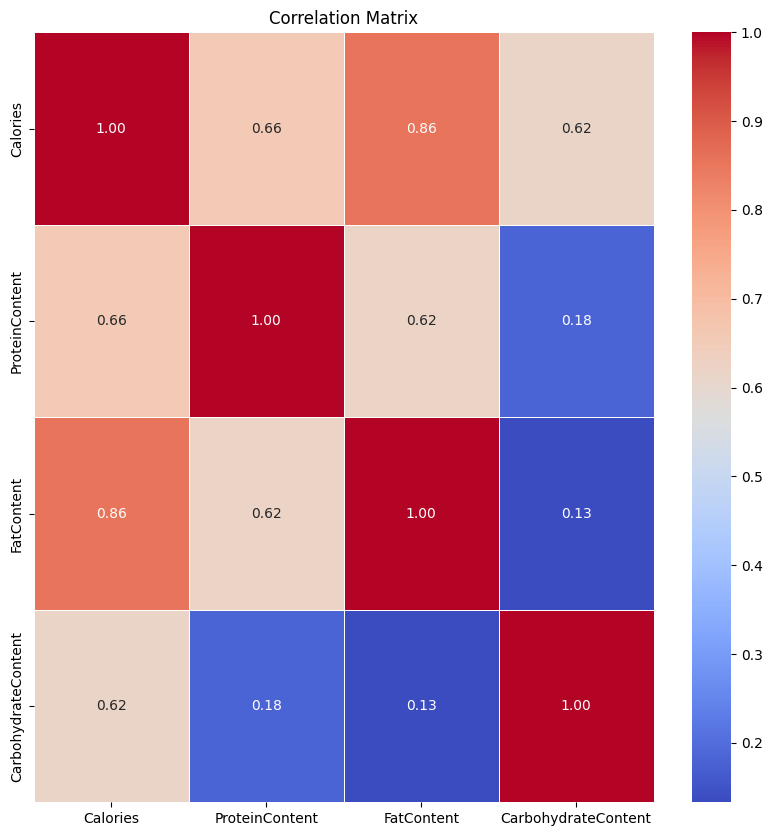

In [11]:
correlationmatrix = df1[['Calories', 'ProteinContent', 'FatContent', 'CarbohydrateContent']].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlationmatrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

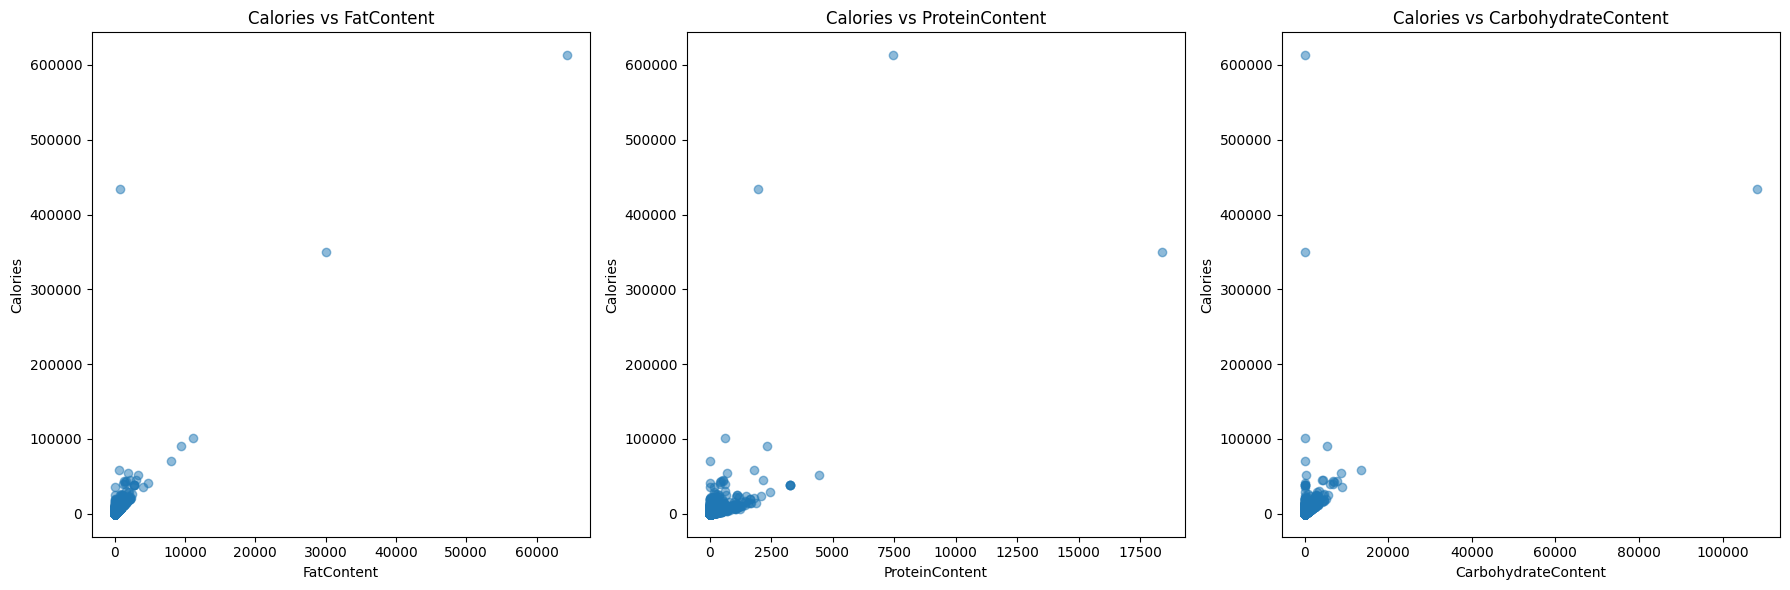

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot for FatContent
axs[0].scatter(df1['FatContent'], df1['Calories'], alpha=0.5)
axs[0].set_title('Calories vs FatContent')
axs[0].set_xlabel('FatContent')
axs[0].set_ylabel('Calories')

# Plot for ProteinContent
axs[1].scatter(df1['ProteinContent'], df1['Calories'], alpha=0.5)
axs[1].set_title('Calories vs ProteinContent')
axs[1].set_xlabel('ProteinContent')
axs[1].set_ylabel('Calories')

# Plot for CarbohydrateContent
axs[2].scatter(df1['CarbohydrateContent'], df1['Calories'], alpha=0.5)
axs[2].set_title('Calories vs CarbohydrateContent')
axs[2].set_xlabel('CarbohydrateContent')
axs[2].set_ylabel('Calories')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [14]:

# Select the columns to normalize
columns_to_normalize = ['Calories', 'ProteinContent', 'FatContent', 'CarbohydrateContent']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
df_normalized = df1.copy()
df_normalized[columns_to_normalize] = scaler.fit_transform(df1[columns_to_normalize])



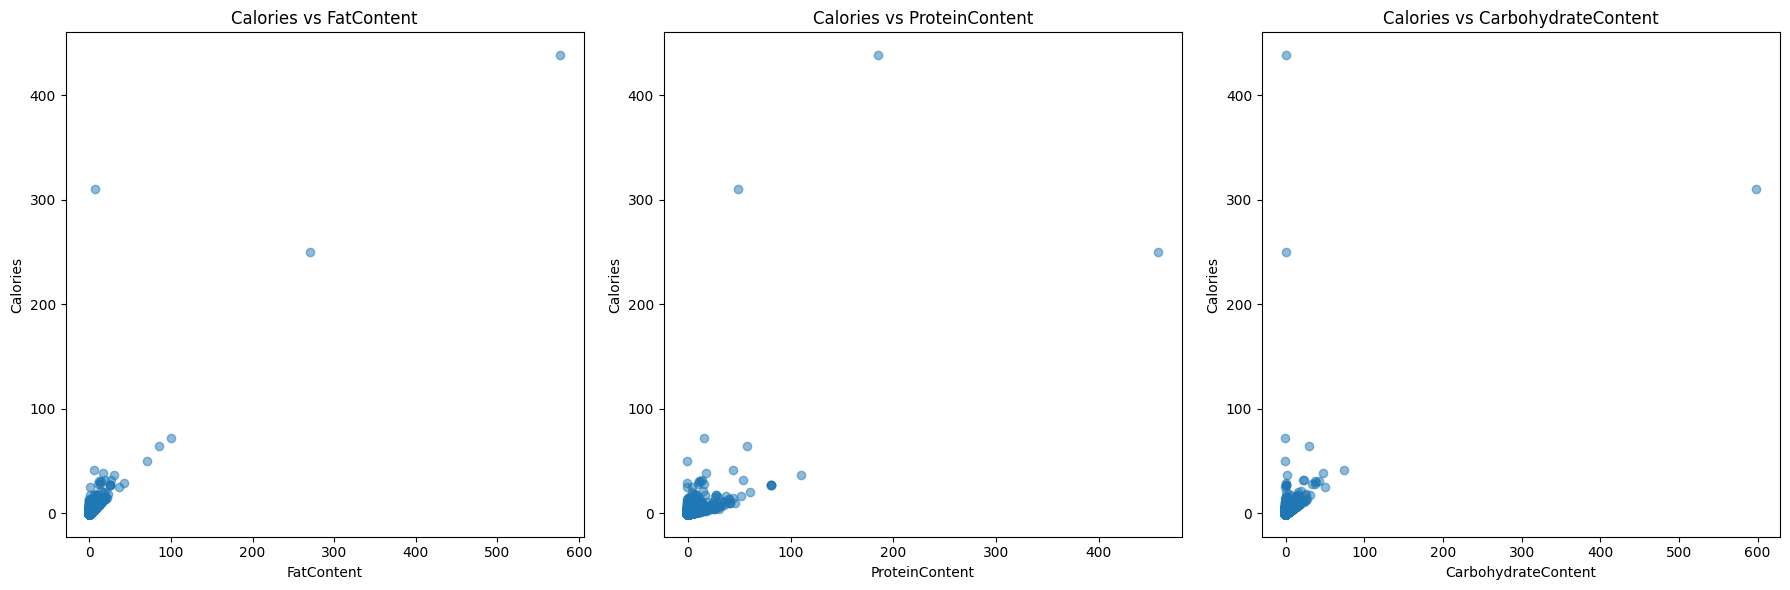

In [16]:
# Create three subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot for FatContent
axs[0].scatter(df_normalized['FatContent'], df_normalized['Calories'], alpha=0.5)
axs[0].set_title('Calories vs FatContent')
axs[0].set_xlabel('FatContent')
axs[0].set_ylabel('Calories')

# Plot for ProteinContent
axs[1].scatter(df_normalized['ProteinContent'], df_normalized['Calories'], alpha=0.5)
axs[1].set_title('Calories vs ProteinContent')
axs[1].set_xlabel('ProteinContent')
axs[1].set_ylabel('Calories')

# Plot for CarbohydrateContent
axs[2].scatter(df_normalized['CarbohydrateContent'], df_normalized['Calories'], alpha=0.5)
axs[2].set_title('Calories vs CarbohydrateContent')
axs[2].set_xlabel('CarbohydrateContent')
axs[2].set_ylabel('Calories')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [20]:
# Remove outliers using z-score method
z_scores = stats.zscore(df_normalized[columns_to_normalize])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_filtered = df_normalized[filtered_entries]



In [27]:
print(df_filtered.shape)

(516856, 28)


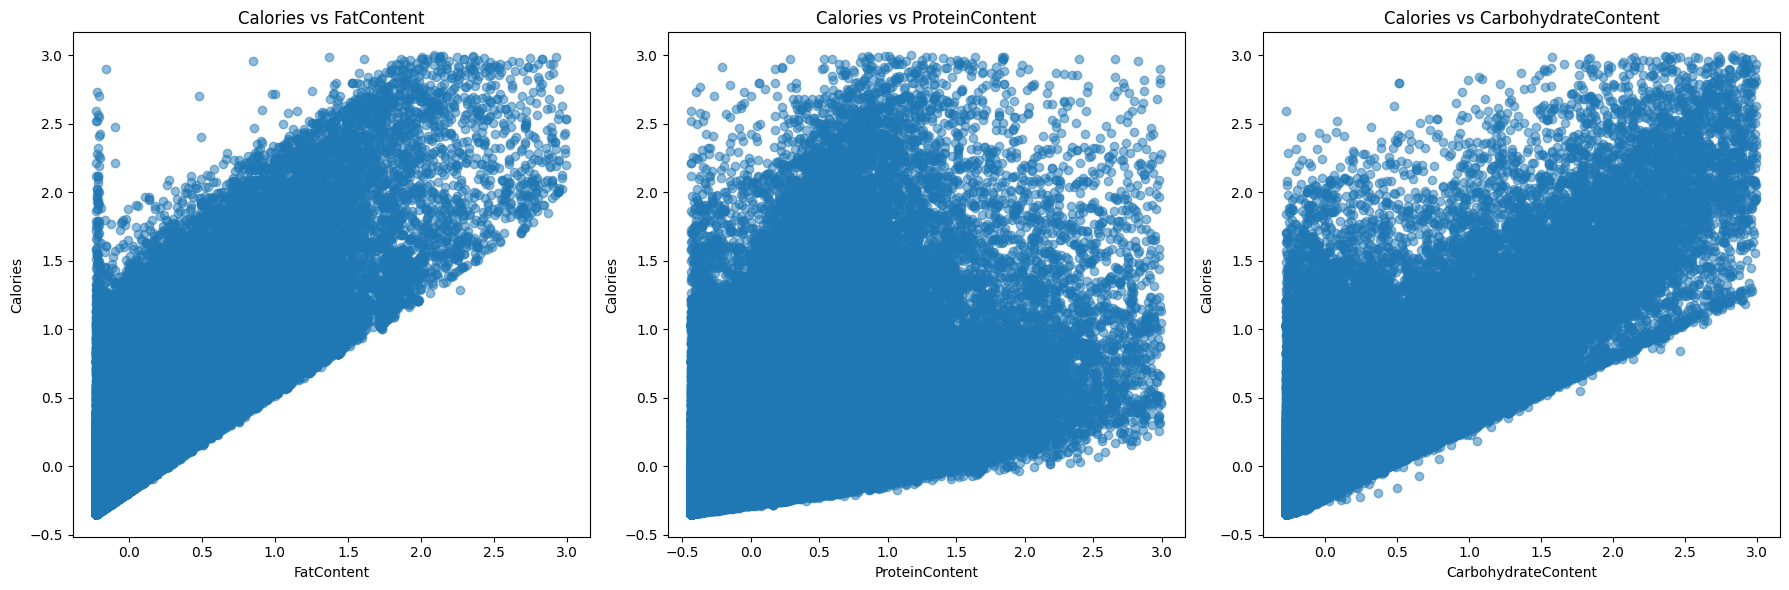

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot for FatContent
axs[0].scatter(df_filtered['FatContent'], df_filtered['Calories'], alpha=0.5)
axs[0].set_title('Calories vs FatContent')
axs[0].set_xlabel('FatContent')
axs[0].set_ylabel('Calories')

# Plot for ProteinContent
axs[1].scatter(df_filtered['ProteinContent'], df_filtered['Calories'], alpha=0.5)
axs[1].set_title('Calories vs ProteinContent')
axs[1].set_xlabel('ProteinContent')
axs[1].set_ylabel('Calories')

# Plot for CarbohydrateContent
axs[2].scatter(df_filtered['CarbohydrateContent'], df_filtered['Calories'], alpha=0.5)
axs[2].set_title('Calories vs CarbohydrateContent')
axs[2].set_xlabel('CarbohydrateContent')
axs[2].set_ylabel('Calories')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [22]:
X = df_filtered[['ProteinContent', 'FatContent', 'CarbohydrateContent']]
y = df_filtered[['Calories']]

# Split the filtered data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared Score (R2)
r2 = r2_score(y_test, y_pred)

# Print MSE and R2
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 0.0009152894024375917
R-squared Score: 0.991348466371954
